# Part d: regression on 1Dim ising modellusing a multilayer perceptron (neural network)

In [1]:
import numpy as np
import scipy.sparse as sp
np.random.seed(12)

import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

from model_comparison import model_comparison
from resample import resample
import algorithms
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


from annCopy import NeuralNetMLP
from ann import NeuralNetMLPdeep
from utils import train_test_split
%matplotlib inline

In [2]:
### define Ising model aprams
# system size
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)

"""
Comparing to project 1 - x = states, z = energies... 
Currently no y since we are in one dimension. 

"""

'\nComparing to project 1 - x = states, z = energies... \nCurrently no y since we are in one dimension. \n\n'

In [3]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2])) 
# build final data set
Data=[states,energies]

# define number of samples
n_samples=600
# define train and test data sets


In [4]:
X=Data[0]
Y=Data[1]

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, split_size=0.5)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((5000, 1600), (5000,), (5000, 1600), (5000,))

In [6]:
"""
ann = NeuralNetMLPdeep(l2 = 0.0001, 
                   batch_size=10, 
                   epochs=50, 
                   n_hidden=30,
                   eta = 0.01,
                    tpe = "regression")

ann.fit(X_train, y_train, X_valid, y_valid)
ann.predict(X_valid)
# returns a list of the mean mse score for different epochs or batches
metric.append(ann.eval_["valid_preform"])
print(" for lmd "+str(l) + " and eta: " + str(e) + "   performance is " + str(np.mean(ann.eval_["valid_preform"])))
"""

'\nann = NeuralNetMLPdeep(l2 = 0.0001, \n                   batch_size=10, \n                   epochs=50, \n                   n_hidden=30,\n                   eta = 0.01,\n                    tpe = "regression")\n\nann.fit(X_train, y_train, X_valid, y_valid)\nann.predict(X_valid)\n# returns a list of the mean mse score for different epochs or batches\nmetric.append(ann.eval_["valid_preform"])\nprint(" for lmd "+str(l) + " and eta: " + str(e) + "   performance is " + str(np.mean(ann.eval_["valid_preform"])))\n'

# Two layer MLP (Neural network )

In [7]:
# Experimental setup
metric = []

eta = [0.0001, 0.001, 0.01, 0.1]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

for e in eta:
    for l in lmd:
        ann = NeuralNetMLP(n_hidden=30, 
                           l2=l,
                           epochs=1, 
                           eta=0.001, 
                           shuffle=True,
                           batch_size=10, 
                           seed=1, 
                           alpha=0.0001, 
                           activation='sigmoid', 
                           tpe = "regression")
            
        ann.fit(X_train, y_train, X_valid, y_valid)
        ann.predict(X_valid)
        # returns a list of the mean mse score for different epochs or batches
        metric.append(ann.eval_["valid_preform"])
        print(" for lmd "+str(l) + " and eta: " + str(e) + "   performance is " + str(np.mean(ann.eval_["valid_preform"])))

 for lmd 0.0001 and eta: 0.0001   performance is 41.9994017394
 for lmd 0.001 and eta: 0.0001   performance is 41.9991336304
 for lmd 0.01 and eta: 0.0001   performance is 41.99646124
 for lmd 0.1 and eta: 0.0001   performance is 41.9705862651
 for lmd 1.0 and eta: 0.0001   performance is 41.7794205246
 for lmd 10 and eta: 0.0001   performance is 41.5002825241
 for lmd 0.0001 and eta: 0.001   performance is 41.9994017394
 for lmd 0.001 and eta: 0.001   performance is 41.9991336304
 for lmd 0.01 and eta: 0.001   performance is 41.99646124
 for lmd 0.1 and eta: 0.001   performance is 41.9705862651
 for lmd 1.0 and eta: 0.001   performance is 41.7794205246
 for lmd 10 and eta: 0.001   performance is 41.5002825241
 for lmd 0.0001 and eta: 0.01   performance is 41.9994017394
 for lmd 0.001 and eta: 0.01   performance is 41.9991336304
 for lmd 0.01 and eta: 0.01   performance is 41.99646124
 for lmd 0.1 and eta: 0.01   performance is 41.9705862651
 for lmd 1.0 and eta: 0.01   performance is 

In [8]:
av = np.average(metric, axis = 1)

In [9]:
av

array([ 41.99940174,  41.99913363,  41.99646124,  41.97058627,
        41.77942052,  41.50028252,  41.99940174,  41.99913363,
        41.99646124,  41.97058627,  41.77942052,  41.50028252,
        41.99940174,  41.99913363,  41.99646124,  41.97058627,
        41.77942052,  41.50028252,  41.99940174,  41.99913363,
        41.99646124,  41.97058627,  41.77942052,  41.50028252])

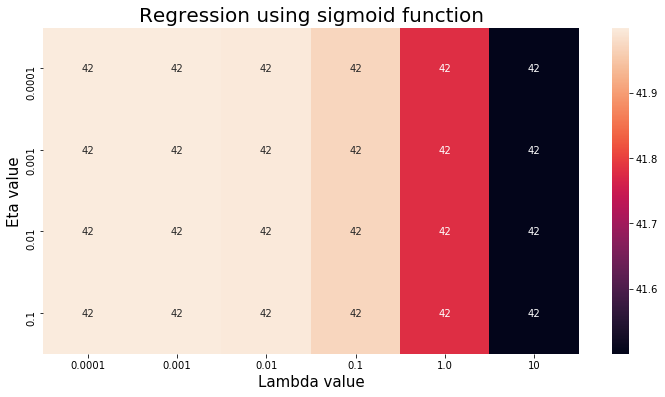

In [17]:
m = np.array(av).reshape((len(eta), len(lmd)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=lmd, yticklabels=eta)
ax.set_title("Regression using sigmoid function", fontsize = 20)
ax.set_xlabel("Lambda value", fontsize = 15)
ax.set_ylabel("Eta value", fontsize = 15) #
plt.savefig("./results/figures/regression_ridge_nn_sigmoid_epochs_1.png")

In [25]:
# Experimental setup
metric = []

eta = [0.0001, 0.001, 0.01, 0.1]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

for e in eta:
    for l in lmd:
        ann = NeuralNetMLP(n_hidden=30, 
                           l2=l,
                           epochs=1, 
                           eta=0.001, 
                           shuffle=True,
                           batch_size=10, 
                           seed=1, 
                           alpha=0.0001, 
                           activation='elu', 
                           tpe = "regression")
            
        ann.fit(X_train, y_train, X_valid, y_valid)
        ann.predict(X_valid)
        # returns a list of the mean mse score for different epochs or batches
        metric.append(ann.eval_["valid_preform"])
        print(" for lmd "+str(l) + " and eta: " + str(e) + "   performance is " + str(np.mean(ann.eval_["valid_preform"])))

 for lmd 0.0001 and eta: 0.0001   performance is 46.6433763801
 for lmd 0.001 and eta: 0.0001   performance is 46.6395888134
 for lmd 0.01 and eta: 0.0001   performance is 46.6018791162
 for lmd 0.1 and eta: 0.0001   performance is 46.2408739081
 for lmd 1.0 and eta: 0.0001   performance is 43.8365220415
 for lmd 10 and eta: 0.0001   performance is 41.5100378292
 for lmd 0.0001 and eta: 0.001   performance is 46.6433763801
 for lmd 0.001 and eta: 0.001   performance is 46.6395888134
 for lmd 0.01 and eta: 0.001   performance is 46.6018791162
 for lmd 0.1 and eta: 0.001   performance is 46.2408739081
 for lmd 1.0 and eta: 0.001   performance is 43.8365220415
 for lmd 10 and eta: 0.001   performance is 41.5100378292
 for lmd 0.0001 and eta: 0.01   performance is 46.6433763801
 for lmd 0.001 and eta: 0.01   performance is 46.6395888134
 for lmd 0.01 and eta: 0.01   performance is 46.6018791162
 for lmd 0.1 and eta: 0.01   performance is 46.2408739081
 for lmd 1.0 and eta: 0.01   performan

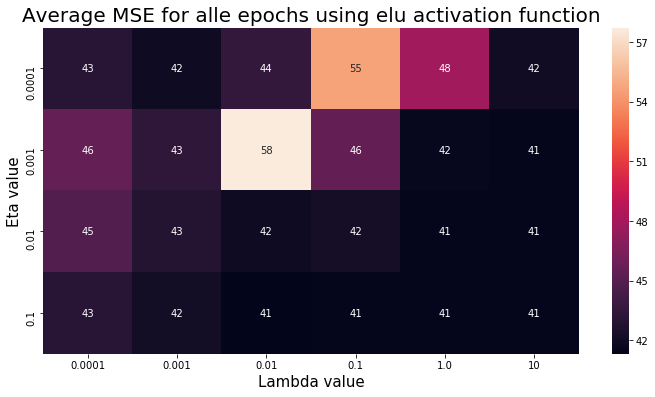

In [28]:
m = np.array(av).reshape((len(eta), len(lmd)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=lmd, yticklabels=eta)
ax.set_title("Average MSE for alle epochs using elu activation function", fontsize = 20)
ax.set_xlabel("Lambda value", fontsize = 15)
ax.set_ylabel("Eta value", fontsize = 15) #
plt.savefig("./results/figures/regression_ridge_nn_elu_epochs_1.png")

In [16]:
# Experimental setup
metric = []

eta = [0.0001, 0.001, 0.01, 0.1]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

for e in eta:
    for l in lmd:
        ann = NeuralNetMLP(l2 = l, 
                           batch_size=10, 
                           epochs=10, 
                           n_hidden=30,
                           eta = e,
                           tpe = "regression")

        ann.fit(X_train, y_train, X_valid, y_valid)
        ann.predict(X_valid)
        # returns a list of the mean mse score for different epochs or batches
        metric.append(np.average(ann.eval_["valid_preform"]))
        print("Testedata: for lmd "+str(l) + " and eta: " + str(e) + "   performance is " + str(np.mean(ann.eval_["valid_preform"])))
        print("Training data: for lmd "+str(l) + " and eta: " + str(e) + "   performance is " + str(np.mean(ann.eval_["train_preform"])))

Testedata: for lmd 0.0001 and eta: 0.0001   performance is 43.0992489893
Training data: for lmd 0.0001 and eta: 0.0001   performance is 42.2011362779
Testedata: for lmd 0.001 and eta: 0.0001   performance is 41.9251197638
Training data: for lmd 0.001 and eta: 0.0001   performance is 40.8825341282
Testedata: for lmd 0.01 and eta: 0.0001   performance is 43.5299584664
Training data: for lmd 0.01 and eta: 0.0001   performance is 42.4501437801
Testedata: for lmd 0.1 and eta: 0.0001   performance is 54.6632352575
Training data: for lmd 0.1 and eta: 0.0001   performance is 53.8360620039
Testedata: for lmd 1.0 and eta: 0.0001   performance is 47.8936115566
Training data: for lmd 1.0 and eta: 0.0001   performance is 47.0759961168
Testedata: for lmd 10 and eta: 0.0001   performance is 42.0359309864
Training data: for lmd 10 and eta: 0.0001   performance is 41.1017322576
Testedata: for lmd 0.0001 and eta: 0.001   performance is 45.5841047798
Training data: for lmd 0.0001 and eta: 0.001   perform

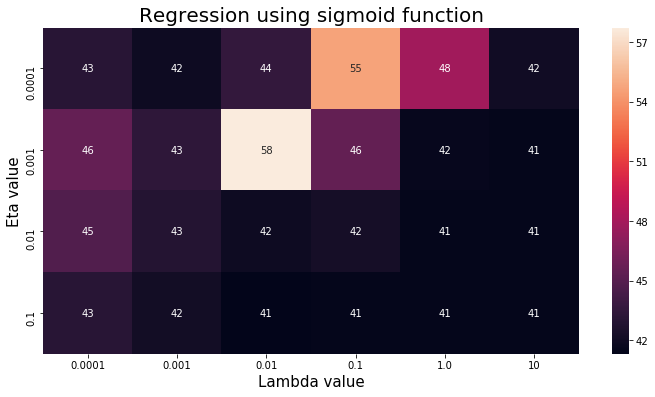

In [24]:
av = np.average(metric, axis = 1)
m = np.array(av).reshape((len(eta), len(lmd)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=lmd, yticklabels=eta)
ax.set_title("Regression using sigmoid function", fontsize = 20)
ax.set_xlabel("Lambda value", fontsize = 15)
ax.set_ylabel("Eta value", fontsize = 15) #
plt.savefig("./results/figures/regression_ridge_nn_sigmoid_epochs_10.png")

In [36]:
ann = NeuralNetMLP(l2 = 0.001, 
                   batch_size=10, 
                   epochs=10, 
                   n_hidden=100,
                   eta = 0.001,
                   activation="elu",
                   tpe = "regression")

ann.fit(X_train, y_train, X_valid, y_valid)
ann.predict(X_valid)
# returns a list of the mean mse score for different epochs or batches
metric.append(np.average(ann.eval_["valid_preform"]))
print("Testedata: for lmd "+str(0.001) + " and eta: " + str(0.001) + "   performance is " + str(np.mean(ann.eval_["valid_preform"])))
       

Testedata: for lmd 0.001 and eta: 0.001   performance is 46.8044869225


# Comparing to scikitlearn MLPregression

In [19]:
from sklearn.neural_network import MLPRegressor
from utils import mean_squared_error

In [22]:
mlp = MLPRegressor(hidden_layer_sizes=(30, ), activation = 'logistic', solver = "sgd", alpha = 0.0001, batch_size =10, learning_rate_init=0.01)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)
#logistic activation uses the sigmoid function 
mean_squared_error(y_pred, y_valid)

2.7296874848552193

In [18]:
mlp = MLPRegressor(hidden_layer_sizes=(30, ), activation = 'relu', solver = "sgd", alpha = 0.0001, batch_size =10, learning_rate_init=0.01)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)

In [21]:
mean_squared_error(y_pred, y_valid)

9450745.3713655714